In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/content/College_Data.csv')

In [10]:
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [11]:
dict = {"Yes":1,"No" : 0}
data['Private'] = [dict[item] for item in data['Private']]

In [12]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
len(data)

777

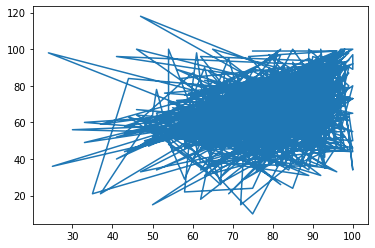

In [41]:
plt.plot('Terminal','Grad.Rate',data = data)

In [18]:
X = data.drop('Grad.Rate',axis = 1)
y = data['Grad.Rate'].values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 20)

In [21]:
from sklearn.preprocessing import StandardScaler
X_tr = StandardScaler()
X_te = StandardScaler()
X_train = X_tr.fit_transform(X_train)
X_test = X_te.fit_transform(X_test)

y_tr = StandardScaler()
y_te = StandardScaler()
y_train = y_tr.fit_transform(y_train)
y_test = y_te.fit_transform(y_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predict = lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [28]:
print('R2 Score {}'.format(r2_score(y_test,predict)))
print('MSE Score {}'.format(mean_squared_error(y_test,predict)))
print('MAE Score {}'.format(mean_absolute_error(y_test,predict)))

R2 Score 0.4577736635437011
MSE Score 0.5422263364562991
MAE Score 0.5553749152249015


In [31]:
from sklearn.svm import SVR

In [32]:
sv = SVR()

In [33]:
sv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
predict = sv.predict(X_test)

In [35]:
print('R2 Score {}'.format(r2_score(y_test,predict)))
print('MSE Score {}'.format(mean_squared_error(y_test,predict)))
print('MAE Score {}'.format(mean_absolute_error(y_test,predict)))

R2 Score 0.4375739104251205
MSE Score 0.5624260895748797
MAE Score 0.5672689951354658
